In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches

from astropy.io import fits
from astropy.wcs import WCS, utils
from astropy.visualization.wcsaxes import WCSAxes
from astropy.coordinates import SkyCoord, Galactic
from astropy import units as u
from astropy import coordinates as coord
from astropy.utils.data import get_pkg_data_filename

import pyregion
from pyregion.mpl_helper import properties_func_default

from scipy import ndimage, interpolate

In [21]:
hdu = fits.open('fitsfiles/rxj1713_pearson_suz_mHI.fits')
image_data = hdu[0].data
image_header = hdu[0].header

for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        if image_data[i][j] == -10:
            image_data[i][j] = np.nan

results = np.loadtxt('correlation_study_data/output/gamma_mopHI.txt', skiprows=1, dtype={'names': ('A','B','C'),'formats': ('float', 'float', 'U5')})

reg = np.empty(29)
# reg2 = ["" for j in range(29)]
for i in range(len(results)):
    reg[i] = results[i][0]
#     #indicate which regions have a significance >2sig
#     if results[i][1] <(100 - 95.44)/100:
#         reg2[i] = 1
#     else:
#         reg2[i] = -1
    

In [22]:
image_data[6][2] = reg[0]
image_data[6][3] = reg[1]
image_data[6][4] = reg[2]
image_data[6][5] = reg[3]

image_data[5][1] = reg[4]
image_data[5][2] = reg[5]
image_data[5][3] = reg[6]
image_data[5][4] = reg[7]
image_data[5][5] = reg[8]
image_data[5][6] = reg[9]

image_data[4][1] = reg[10]
image_data[4][2] = reg[11]
image_data[4][3] = reg[12]
image_data[4][4] = reg[13]
image_data[4][5] = reg[14]
image_data[4][6] = reg[15]

image_data[3][1] = reg[16]
image_data[3][2] = reg[17]
image_data[3][3] = reg[18]
image_data[3][4] = reg[19]
image_data[3][5] = reg[20]
image_data[3][6] = reg[21]

image_data[2][1] = reg[22]
image_data[2][2] = reg[23]
image_data[2][3] = reg[24]
image_data[2][4] = reg[25]
image_data[2][5] = reg[26]

image_data[1][3] = reg[27]
image_data[1][4] = reg[28]

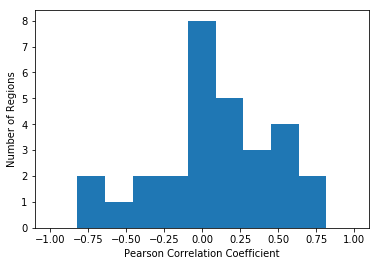

In [26]:
data = [i for i in image_data.flatten() if i > -2.0]
plt.hist(data,11, range=[-1,1])
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Regions")
plt.show()

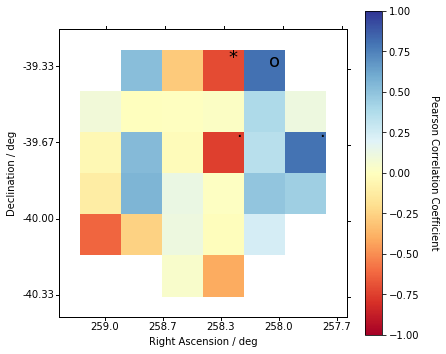

In [58]:
fig = plt.figure(figsize=(5,4.5))


wcs = WCS(image_header)
ax = WCSAxes(fig, [0,0,1,1], wcs= wcs)
fig.add_axes(ax)

ra = ax.coords['ra']
dec = ax.coords['dec']

#format axes
ra.set_major_formatter('d.d')
dec.set_major_formatter('d.dd')

plt.xlabel('Right Ascension / deg')
plt.ylabel('Declination / deg')

plt.imshow(image_data, cmap=plt.cm.RdYlBu, vmin =-1, vmax = 1, rasterized=True)
cbar = plt.colorbar()
cbar.set_label('Pearson Correlation Coefficient', rotation=270, labelpad=20)

plt.xlim(0,7)
plt.ylim(0,7) #flip y-axis

#Regions with significance > 2sigma
plt.text(4.1,6.17,'*',fontsize=18)
plt.text(5.1,6.07,'o',fontsize=18)
plt.text(4.3,4.37,'.',fontsize=18)
plt.text(6.3,4.37,'.',fontsize=18)

plt.savefig('correlation_study_data/output/pearsonmap_gam_mopHI.ps', bbox_inches='tight', pad_inches=0.06)

plt.show()


# 